# Laptop Price Predictor

# Ref Link - 

https://www.analyticsvidhya.com/blog/2021/11/laptop-price-prediction-practical-understanding-of-machine-learning-project-lifecycle/

https://github.com/campusx-official/laptop-price-predictor-regression-project/blob/main/laptop-price-predictor.ipynb

https://www.youtube.com/watch?v=BgpM2IiCH6k&list=PLKnIA16_RmvY5eP91BGPa0vXUYmIdtfPQ&index=13

# Good use of feature engineering us there as the column has lots of info
- ScreenResolution has Display info, screen resolution, etc.
- CPU has many info - like Intel core, speed of processor, etc.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\akshat.agrawal\Desktop\Machine Learning\Data\laptop_data.csv")

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape

(1303, 12)

In [5]:
df.isnull().sum() # no null values

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [7]:
df.info() # we need to focus on dataype of some columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [8]:
df.duplicated().sum() # No duplicated rows

0

# Observations
- unnames is an unnecessary column
- ScreenResolution, RAM, Memory, CPU, weight all in object type
- no nulls, no duplicated

# Data Preprocessing

In [9]:
df.drop(columns=['Unnamed: 0'], inplace=True) # removing irrelevant column

In [10]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [11]:
#RAM column 
df['Ram'] = df['Ram'].str.replace('GB','')
df['Ram'] = df['Ram'].astype('int32')

In [12]:
# Weight Column
df['Weight'] = df['Weight'].str.replace('kg',"")
df['Weight'] = df['Weight'].astype('float32')

In [13]:
df.info() # we can check the datatype of RAM and Weight columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


# Univariate and BIvariate ANalysis

# Price column

C:\Users\akshat.agrawal\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

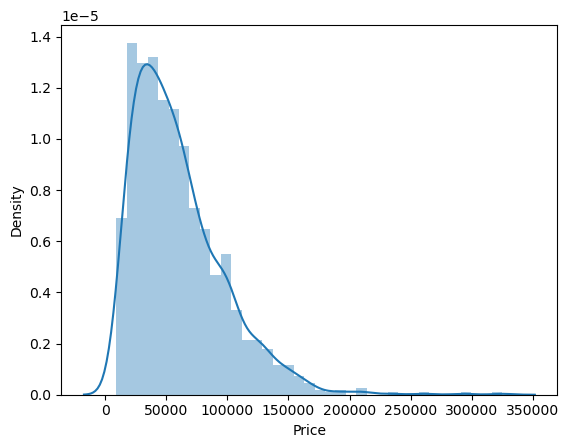

In [14]:
import seaborn as sns
sns.distplot(df['Price'])

- we see that data is a bit right skewed, as there are too many laptops in the price range of 40k to 1 lac but very few in the higher range but it is obvious as expensive things are less than cheaper things
- few algo might have an issue with skewness, so it needs to be taken care of by transformation

# Which brand has how many laptops?

# Company

df['Company'].value_counts().sort_values(ascending=False).plot(kind = 'bar')

 or
 plt.xticks(rotation=40)
 plt.plot(df['Company'].value_counts().sort_values(ascending=False))

 we may drop some company names which have very few laptops, some less renowned brands

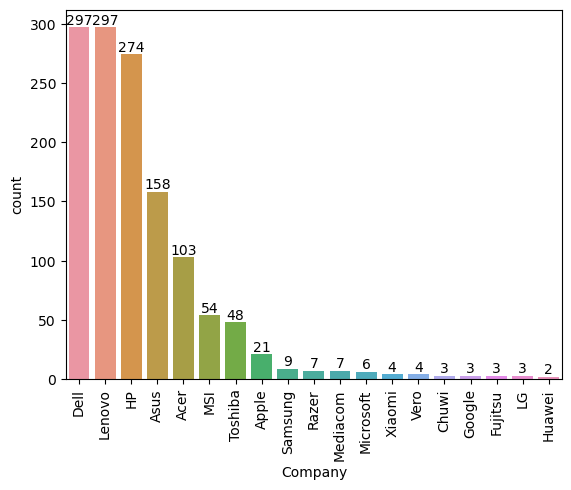

In [15]:
ax = sns.countplot(x=df['Company'],
                   order=df['Company'].value_counts(ascending=False).index);

abs_values = df['Company'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0])
plt.xticks(rotation=90)
plt.show()

# Average price of laptops of each brands

In [16]:
ser = df.groupby('Company').mean()['Price']
ser.sort_values(ascending=False)

Company
Razer        178282.491429
LG           111834.720000
MSI           92116.226133
Google        89386.080000
Microsoft     85903.788000
Apple         83340.499886
Huawei        75870.720000
Samsung       75308.320000
Toshiba       67549.050000
Dell          63193.755782
Xiaomi        60390.882000
Asus          58830.143878
Lenovo        57882.563200
HP            56891.044222
Fujitsu       38841.120000
Acer          33394.615969
Chuwi         16745.726400
Mediacom      15717.600000
Vero          11584.404000
Name: Price, dtype: float64

In [17]:
ser.sort_values(ascending=False).index

Index(['Razer', 'LG', 'MSI', 'Google', 'Microsoft', 'Apple', 'Huawei',
       'Samsung', 'Toshiba', 'Dell', 'Xiaomi', 'Asus', 'Lenovo', 'HP',
       'Fujitsu', 'Acer', 'Chuwi', 'Mediacom', 'Vero'],
      dtype='object', name='Company')

<AxesSubplot:xlabel='Company', ylabel='Price'>

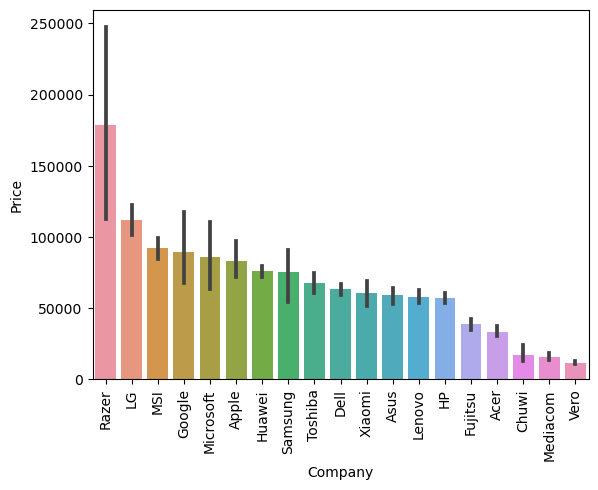

In [18]:
#df.groupby('Company').mean()['Price'].plot(kind='bar')

#plt.plot()
plt.xticks(rotation="vertical")
sns.barplot(x=df['Company'], y=df['Price'],order=ser.sort_values(ascending=False).index)
#      plt.show()

# Razer, Apple, LG, Microsoft, Google, MSI laptops are expensive, and others are in the budget range.
# means prices vary with the brand as there are variations in prices acc to company

# TypeName column

In [19]:
df['TypeName'].unique()
# there are 6 types of laptops

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [20]:
ser1 = df.groupby('TypeName').mean()['Price']
ser1.sort_values(ascending=False) 
# most expensove is the Workstation

TypeName
Workstation           121497.525683
Gaming                 92247.960187
Ultrabook              82489.713429
2 in 1 Convertible     68326.360066
Notebook               41669.149113
Netbook                33898.440960
Name: Price, dtype: float64

In [21]:
ser1.sort_values(ascending=False).index

Index(['Workstation', 'Gaming', 'Ultrabook', '2 in 1 Convertible', 'Notebook',
       'Netbook'],
      dtype='object', name='TypeName')

<AxesSubplot:xlabel='TypeName', ylabel='Price'>

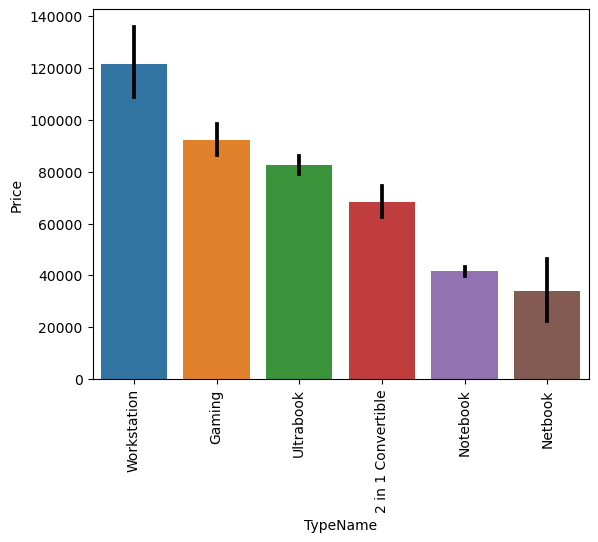

In [22]:
# df['TypeName'].value_counts().plot(kind = 'bar')
plt.xticks(rotation='vertical')
sns.barplot(x=df['TypeName'] , y = df['Price'],errcolor='Black', order=ser1.sort_values(ascending=False).index)
# Which type of laptop we are looking for like a gaming laptop, workstation, or notebook. As major people prefer notebook 
# because it is under budget range and the same can be concluded from our data.

# Same visualization using a pie chart

<AxesSubplot:ylabel='Price'>

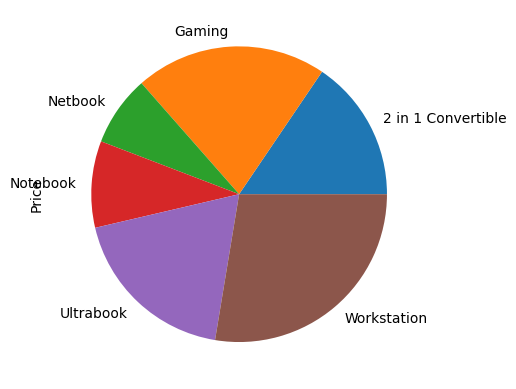

In [23]:
ser1.plot(kind='pie')   # pie plot according to price of types of laptops

<AxesSubplot:ylabel='TypeName'>

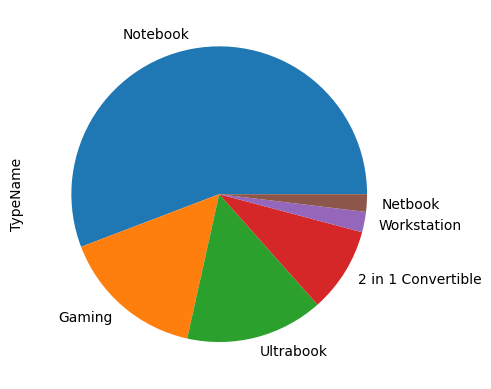

In [24]:
df['TypeName'].value_counts().plot(kind = 'pie') # pie plot according to count of values

In [25]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232


# Inches column

# Does the price vary with laptop size in inches?

- A Scatter plot is used when both the columns are numerical and it answers our question in a better way. From the below plot we can conclude that there is a relationship but not a strong relationship between the price and size column

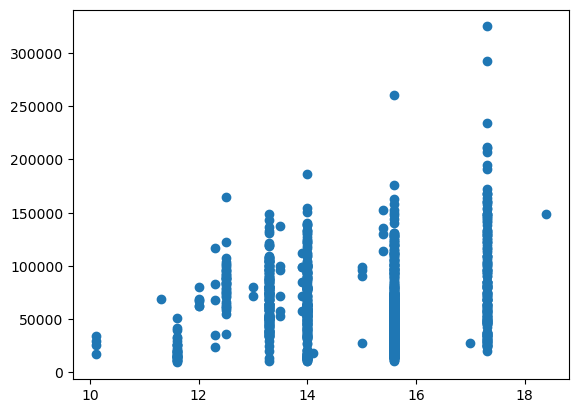

In [26]:
plt.scatter(x = df['Inches'] , y = df['Price'])

# prices increase according to size but there is not a very strong correlation as 12,14,16 inches have similar price range
# only when laptop size is increased too much then price increases significantly

In [27]:
df.corr() # we see that there is only 60% correlation between price and inches

,Inches,Ram,Weight,Price
Inches,1.000000,0.237993,0.827631,0.068197
Ram,0.237993,1.000000,0.383874,0.743007
Weight,0.827631,0.383874,1.000000,0.210370
Price,0.068197,0.743007,0.210370,1.000000


C:\Users\akshat.agrawal\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

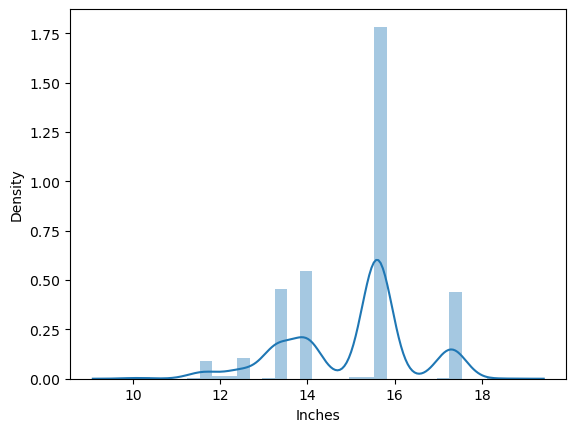

In [28]:
sns.distplot(df['Inches'])
# maximum laptops are in the range of 15-16 inches

In [29]:
df.groupby('Inches').mean()['Price'].sort_values(ascending=False).index
# Average price of the laptops according to size in inches

Float64Index([18.4, 15.4, 17.3, 13.9, 13.5, 12.5, 15.0, 13.0, 13.3, 11.3, 12.0,
              12.3, 14.0, 15.6, 17.0, 10.1, 11.6, 14.1],
             dtype='float64', name='Inches')

plt.xticks(rotation='vertical')
df.groupby('Inches').mean()['Price'].plot(kind = 'bar')
plt.plot()

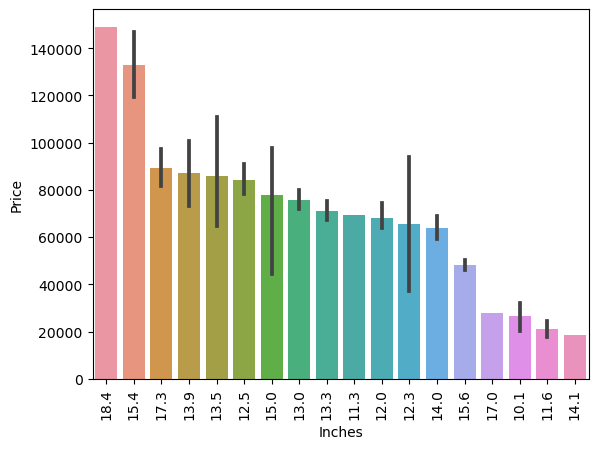

In [30]:
sns.barplot(x=df['Inches'], y=df['Price'],
            order=df.groupby('Inches').mean()['Price'].sort_values(ascending=False).index)
plt.xticks(rotation='vertical')
plt.show()

# Feature Engineering and Preprocessing of Laptop Price Prediction Model
Feature engineering is a process to convert raw data to meaningful information. there are many methods that come under feature engineering like transformation, categorical encoding, etc. Now the columns we have are noisy so we need to perform some feature engineering steps.

In [31]:
df.ScreenResolution.unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

# Screen Resolution
- screen resolution contains lots of information. before any analysis first, we need to perform feature engineering over it. If you observe unique values of the column then we can see that all value gives information related to the presence of an IPS panel, a laptop touch screen or not, and the X-axis and Y-axis screen resolution. So, we will extract the column into 3 new columns in the dataset.

# Extract Touch screen information

In [32]:
# It is a binary variable so we can encode it as 0 and 1. one means the laptop is a touch screen and zero indicates not a touch screen

df['TouchScreen'] = df['ScreenResolution'].apply(lambda x : 'Touch' if 'Touchscreen' in x else 'Not Touch')

In [33]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Not Touch
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Not Touch


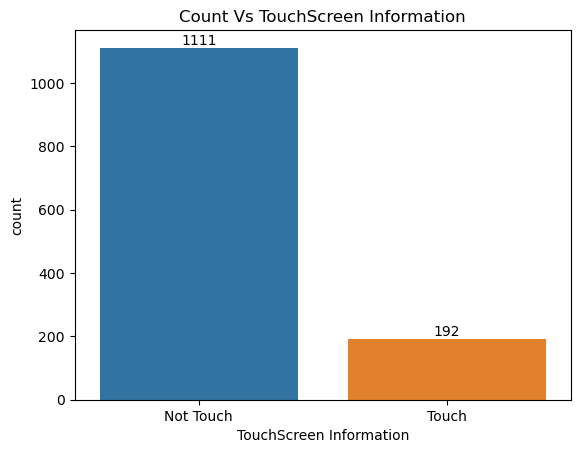

In [34]:
# how many laptops are touchscreen?
ax = sns.countplot(x=df['TouchScreen'],
                   order=df['TouchScreen'].value_counts(ascending=False).index)
# sns.countplot(df['TouchScreen'])

abs_values = df['TouchScreen'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0])
plt.title("Count Vs TouchScreen Information")
plt.xlabel("TouchScreen Information")
plt.show()


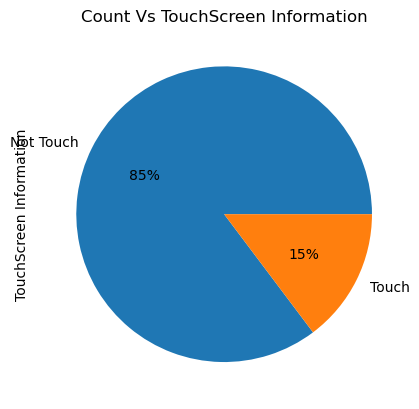

In [35]:
df['TouchScreen'].value_counts().plot(kind = 'pie',autopct='%.0f%%')
plt.ylabel("TouchScreen Information")
plt.title("Count Vs TouchScreen Information")
plt.show()

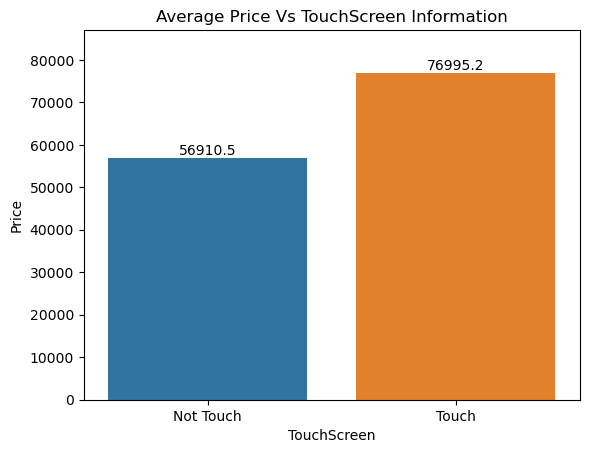

In [36]:
# Toucscreen against Price

ax = sns.barplot(x=df['TouchScreen'] , y=df['Price'], errwidth=0)

# If we plot the touch screen column against price then laptops with touch screens are expensive which is true in real life.
plt.title("Average Price Vs TouchScreen Information")
for i in ax.containers:
    ax.bar_label(i,)

In [37]:
print("Mean Price of Laptops which are not TouchScreen: ",df[df['TouchScreen']=='Not Touch']['Price'].mean())

Mean Price of Laptops which are not TouchScreen:  56910.51886228615


In [38]:
print("Mean Price of TouchScreen Laptops : ",df[df['TouchScreen']=='Touch']['Price'].mean())

Mean Price of TouchScreen Laptops :  76995.20550000004


# Pie Chart to show Count 

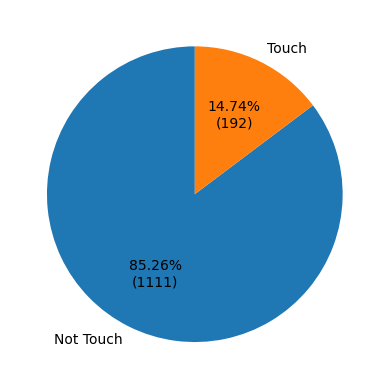

In [39]:
def my_fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

values = df['TouchScreen']
v_counts = values.value_counts()
total = len(values)
fig = plt.figure()
plt.pie(v_counts, labels=v_counts.index, autopct=my_fmt,startangle=90);
plt.show()

# Extract IPS Channel presence information

<AxesSubplot:title={'center':'Price vs IPS Channel Information'}, xlabel='Ips', ylabel='Price'>

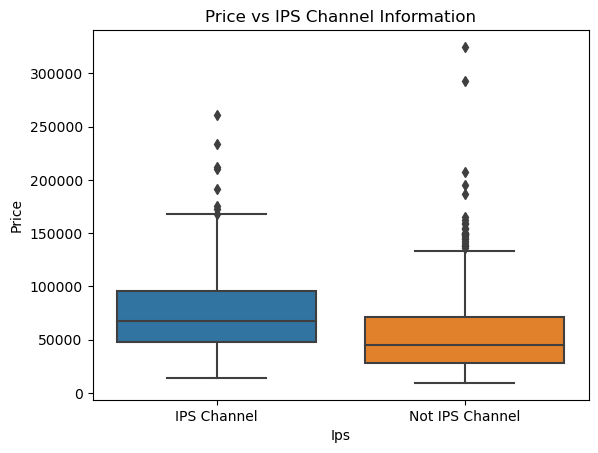

In [40]:
# It is a binary variable and the code is the same we used above. The laptops with IPS channel are present less in our data 
# but by observing relationship against the price of IPS channel laptops are high.

df['Ips'] = df['ScreenResolution'].apply(lambda x: 'IPS Channel' if 'IPS' in x else 'Not IPS Channel')
#sns.barplot(x=df['Ips'],y=df['Price'])
plt.title("Price vs IPS Channel Information")
sns.boxplot(x=df['Ips'],y=df['Price'])
# use box plot instead

# we see that 25% of the IPS Channel laptops are under Rs. 50000, few outliers above 1.5 lacs, 
# maximum value is around 1.6 lacs and so on

# Extract X-axis and Y-axis screen resolution dimensions

Now both the dimension are present at end of a string and separated with a cross sign. So first we will split the string with space and access the last string from the list. then split the string with a cross sign and access the zero and first index for X and Y-axis dimensions.



In [41]:
df.ScreenResolution[0]

'IPS Panel Retina Display 2560x1600'

In [42]:
df.ScreenResolution[0].split()[-1].split("x")[1]

'1600'

In [43]:
def findXresolution(s):
  return s.split()[-1].split("x")[0]
def findYresolution(s):
  return s.split()[-1].split("x")[1]

#finding the x_res and y_res from screen resolution
df['X_res'] = df['ScreenResolution'].apply(lambda x: findXresolution(x))
df['Y_res'] = df['ScreenResolution'].apply(lambda y: findYresolution(y))
#convert to numeric
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [44]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Not Touch,IPS Channel,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Not Touch,Not IPS Channel,1440,900


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   object 
 12  Ips               1303 non-null   object 
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), object(9)
memory usage: 132.5+ KB


In [46]:
df.corr()['Price']
# X_res, Y_res has strong correlation with Price, RAM also


Inches    0.068197
Ram       0.743007
Weight    0.210370
Price     1.000000
X_res     0.556529
Y_res     0.552809
Name: Price, dtype: float64

# PPI - pixel per index
as X_res and Y_res will show multicollinearity and inches have not good correlation
so we are creating a new column names PPI 

In [47]:
df['PPI'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5)/df['Inches']

In [48]:
df['PPI']

0       226.983005
1       127.677940
2       141.211998
3       220.534624
4       226.983005
           ...    
1298    157.350512
1299    276.053530
1300    111.935204
1301    100.454670
1302    100.454670
Name: PPI, Length: 1303, dtype: float64

In [49]:
df.corr()['Price']

# PPI shows much better correlation with Price than Inches

Inches    0.068197
Ram       0.743007
Weight    0.210370
Price     1.000000
X_res     0.556529
Y_res     0.552809
PPI       0.473487
Name: Price, dtype: float64

In [50]:
df.drop(columns='ScreenResolution', inplace = True)

In [51]:
df.drop(columns=['Inches','X_res','Y_res'], inplace = True)

In [52]:
df.head(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Not Touch,IPS Channel,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Not Touch,Not IPS Channel,127.677940


#  CPU column
If we observe the CPU column then it also contains lots of information. If we again use a unique function or value counts function on the CPU column then we have 118 different categories. The information it gives is about preprocessors in laptops and speed.

In [53]:
df['Cpu'].unique()

# there are many unique values but majorly Intel Core i5, Intel Core i3, Intel Core i7, Intel Celeron, Intel Pentium, AMD Ryzen,
# AMD A9-Series so we'll categorize all the Cpu values in these categories

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

# To extract the preprocessor we need to extract the first three words from the string. we are having an Intel preprocessor and AMD preprocessor so we are keeping 5 categories in our dataset as i3, i5, i7, other intel processors, and AMD processors.

In [54]:
df['Cpu'][0].split()[0:3]

['Intel', 'Core', 'i5']

In [55]:
df['Cpu Name'] = df['Cpu'].apply(lambda x : " ".join(x.split()[0:3]))

In [56]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Not Touch,IPS Channel,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Not Touch,Not IPS Channel,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Not Touch,Not IPS Channel,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Not Touch,IPS Channel,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Not Touch,IPS Channel,226.983005,Intel Core i5


In [57]:
df['Cpu Name'][0].split()[-1]

'i5'

In [58]:
def fetch_processor(text_data):
    if text_data == 'Intel Core i5' or text_data == 'Intel Core i3' or text_data =='Intel Core i7':
        return text_data
    else:
        if text_data.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
        
# we are creating 5 categories (Intel Core i5, Intel Core i3, Intel Core i7, other Intel Preocessor 
# and AMD processor)

In [59]:
df['Cpu Brand'] = df['Cpu Name'].apply(fetch_processor)

In [60]:
df['Cpu Brand'].value_counts()

Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: Cpu Brand, dtype: int64

<AxesSubplot:>

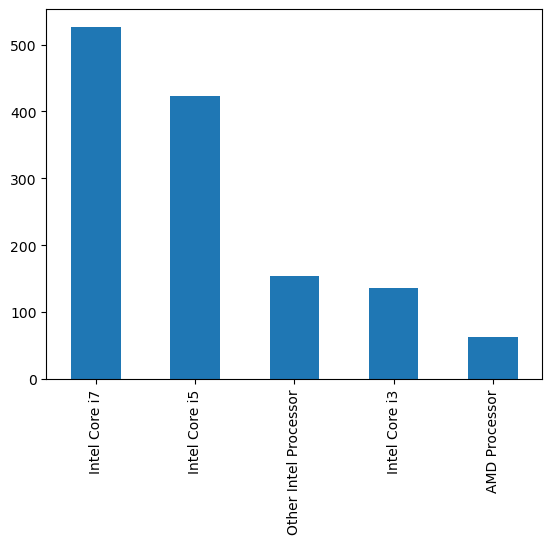

In [61]:
df['Cpu Brand'].value_counts().plot(kind='bar')
# maximum laptops are of intel core i7 processor type followed by i5 then other intel processors and so on

# How does the price vary with processors?

we can again use our bar plot property to answer this question. And as obvious the price of i7 processor is high, then of i5 processor, i3 and AMD processor lies at the almost the same range. Hence price will depend on the preprocessor.

In [62]:
s = df.groupby('Cpu Brand').mean()['Price']
s.sort_values(ascending=False).index

Index(['Intel Core i7', 'Intel Core i5', 'AMD Processor',
       'Other Intel Processor', 'Intel Core i3'],
      dtype='object', name='Cpu Brand')

[]

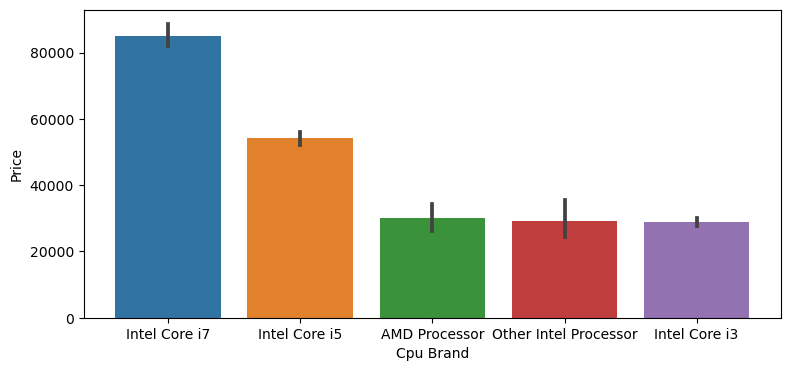

In [63]:
# relation between CPU BRAND and average PRICE
plt.figure(figsize=(9,4))
plt.xlabel("CPU Brand")
sns.barplot(x=df['Cpu Brand'] , y=df['Price'], order=s.sort_values(ascending=False).index)
plt.plot()
# as expected i7 is the most expensive..then i5 then AMD

In [64]:
df.drop(columns=['Cpu', 'Cpu Name'], inplace=True)

In [65]:
df.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Not Touch,IPS Channel,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Not Touch,Not IPS Channel,127.677940,Intel Core i5


# Price with Ram
Again Bivariate analysis of price with Ram. If you observe the plot then Price is having a very strong positive correlation with Ram or you can say a linear relationship.

In [66]:
df['Ram'].unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64])

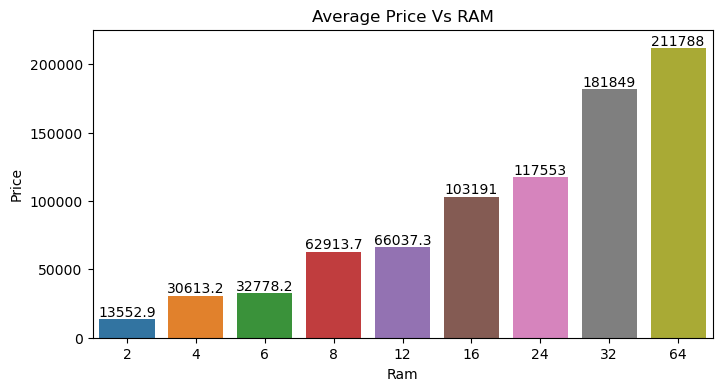

In [67]:
# sns.barplot(x=df['Ram'], y=df['Price'], ci=0)
plt.figure(figsize=(8,4))
ax = sns.barplot(x=df['Ram'] , y=df['Price'], errwidth=0)
plt.title("Average Price Vs RAM")
for i in ax.containers:
    ax.bar_label(i,)

In [68]:
df.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Not Touch,IPS Channel,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Not Touch,Not IPS Channel,127.677940,Intel Core i5


# Memory column
memory column is again a noisy column that gives an understanding of hard drives. many laptops came with HHD and SSD both, as well in some there is an external slot present to insert after purchase. This column can disturb our analysis if feature engineering not done properly. So If we use value counts on a column then we are having 4 different categories of memory as HHD, SSD, Flash storage, and hybrid.

In [69]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

# Whole code 
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

new = df["Memory"].str.split("+", n = 1, expand = True) # a new df with 1 split of Memory column

- n: Numbers of max separations to make in a single string, default is -1 which means all. 
-  expand: Boolean value, returns a data frame with different value in different columns if True. Else it returns a series with list of strings. 

df["first"]= new[0]
df["first"]=df["first"].str.strip() # removing whitespace

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

# Step by Step Explanation

In [70]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
df["Memory"]

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301             1000 HDD
1302              500 HDD
Name: Memory, Length: 1303, dtype: object

In [71]:
new = df["Memory"].str.split("+", n = 1, expand = True)
new.sample(6)
# create a new dataframe by doing 1 split by '+' symbol in the df['Memory'] column

,0,1
471,500 HDD,None
86,256 SSD,None
1282,32 Flash Storage,None
442,256 SSD,None
362,128 SSD,1000 HDD
832,1000 HDD,None


In [72]:
df["first"]= new[0]
df["first"]

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301             1000 HDD
1302              500 HDD
Name: first, Length: 1303, dtype: object

In [73]:
df["first"]=df["first"].str.strip()
df["first"]

# The Strip() method in Python removes or truncates the given characters from the beginning and the end of the original string. 
# The default behavior of the strip() method is to remove the whitespace from the beginning and at the end of the string

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301             1000 HDD
1302              500 HDD
Name: first, Length: 1303, dtype: object

In [74]:
df["second"]= new[1]
df["second"].sample(6)

322           None
674           None
79        1000 HDD
1020          None
228        500 HDD
1090          None
Name: second, dtype: object

In [75]:
# placing 1 where it has values and 0 where it doesn't have values in First and columns


df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)


C:\Users\akshat.agrawal\AppData\Local\Temp\ipykernel_14184\2733581573.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
C:\Users\akshat.agrawal\AppData\Local\Temp\ipykernel_14184\2733581573.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [76]:
df["Layer1HDD"].unique()

array([0, 1], dtype=int64)

In [77]:
df["second"]

0       0
1       0
2       0
3       0
4       0
       ..
1298    0
1299    0
1300    0
1301    0
1302    0
Name: second, Length: 1303, dtype: int32

In [78]:
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

In [79]:
df['HDD'].unique()

array([   0,  500, 1000, 2000,   32,  128], dtype=int64)

In [80]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [81]:
df.drop(columns='Memory' , inplace = True)

In [82]:
df.sample(6)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
531,Toshiba,Notebook,8,Intel HD Graphics 620,Windows 10,2.00,45820.8000,Not Touch,IPS Channel,141.211998,Intel Core i5,500,0,0,0
1192,HP,Notebook,4,Intel HD Graphics 620,Windows 10,1.86,25840.8000,Not Touch,Not IPS Channel,100.454670,Intel Core i5,500,0,0,0
52,HP,Notebook,4,AMD Radeon R4 Graphics,Windows 10,1.86,21231.5472,Not Touch,Not IPS Channel,141.211998,AMD Processor,0,256,0,0
1098,HP,Notebook,4,Intel HD Graphics 405,Windows 10,1.96,26640.0000,Not Touch,Not IPS Channel,100.454670,Other Intel Processor,1000,0,0,0
481,Dell,Notebook,4,Intel HD Graphics 620,Windows 10,2.18,31254.0480,Not Touch,Not IPS Channel,100.454670,Intel Core i3,1000,0,0,0
1133,HP,Ultrabook,8,Intel HD Graphics 620,Windows 10,1.84,40066.5600,Not Touch,Not IPS Channel,141.211998,Intel Core i7,0,256,0,0


# Explanation for Memory Column
First, we have cleaned the memory column and then made 4 new columns which are a binary column where each column contains 1 and 0 indicate that amount four is present and which is not present. Any laptop has a single type of memory or a combination of two. so in the first column, it consists of the first memory size and if the second slot is present in the laptop then the second column contains it else we fill the null values with zero. After that in a particular column, we have multiplied the values by their binary value. It means that if in any laptop particular memory is present then it contains binary value as one and the first value will be multiplied by it, and same with the second combination. For the laptop which does have a second slot, the value will be zero multiplied by zero is zero.

Now when we see the correlation of price then Hybrid and flash storage have very less or no correlation with a price. We will drop this column with CPU and memory which is no longer required

In [83]:
df.corr()['Price']

# strong +ve correlation with SSD, others are not required much


Ram              0.743007
Weight           0.210370
Price            1.000000
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [84]:
df.drop(columns= ['Hybrid','Flash_Storage'] , inplace = True)

In [85]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI,Cpu Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Not Touch,IPS Channel,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,Not Touch,Not IPS Channel,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,Not Touch,Not IPS Channel,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,Not Touch,IPS Channel,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Not Touch,IPS Channel,226.983005,Intel Core i5,0,256


# Gpu column

In [86]:
df['Gpu'].unique()

# 'Intel Iris Plus', 'Intel HD Graphics', 'AMD Radeon', 'Intel Iris Pro','Nvidia GeForce','Intel UHD Graphics','Nvidia GTX',
# 'AMD R17M-M1-70' and so many unique

# GPU(Graphical Processing Unit) has many categories in data. We are having which brand graphic card is there on a laptop. 
# we are not having how many capacities like (6Gb, 12 Gb) graphic card is present. 

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

# so we will simply extract the name of the brand

In [87]:
df['Gpu'].str.split()[0][0]

'Intel'

In [88]:
df['Gpu Brand'] = df['Gpu'].apply(lambda x : x.split()[0])
df['Gpu Brand']

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
1298    Intel
1299    Intel
1300    Intel
1301      AMD
1302    Intel
Name: Gpu Brand, Length: 1303, dtype: object

In [89]:
df['Gpu Brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu Brand, dtype: int64

In [90]:
#there is only 1 row of ARM GPU so remove it

df = df[df['Gpu Brand'] != 'ARM']

In [91]:
df.head(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,Ips,PPI,Cpu Brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Not Touch,IPS Channel,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,Not Touch,Not IPS Channel,127.677940,Intel Core i5,0,0,Intel


In [92]:
df.drop(columns='Gpu', inplace = True)

In [93]:
df.head(2)

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,Ips,PPI,Cpu Brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,Not Touch,IPS Channel,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,Not Touch,Not IPS Channel,127.677940,Intel Core i5,0,0,Intel


In [94]:
se=df.groupby('Gpu Brand').mean()['Price'].sort_values(ascending=False)
se

Gpu Brand
Nvidia    79380.500040
Intel     53718.258994
AMD       41326.507680
Name: Price, dtype: float64

In [95]:
se.index

Index(['Nvidia', 'Intel', 'AMD'], dtype='object', name='Gpu Brand')

<AxesSubplot:title={'center':'Average Price vs GPU Brands'}, xlabel='Gpu Brand', ylabel='Price'>

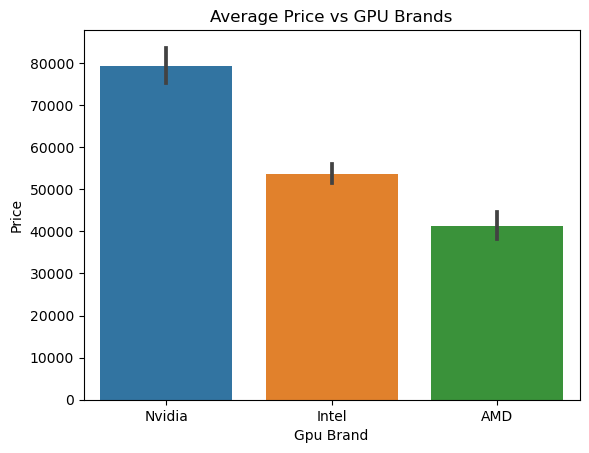

In [96]:
plt.title("Average Price vs GPU Brands")
sns.barplot(x = df['Gpu Brand'] , y=df['Price'], order=se.index)
# most expensive GPU brand is Nvidia
# sns.boxplot

# 

# Operating System Column
- There are many categories of operating systems. we will keep all windows categories in one, Mac in one, and remaining in others. This is a simple and most used feature engineering method, you can try something else if you find more correlation with price.

In [97]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [98]:
def os(data):
    if data=='Windows 10' or data=='Windows 7' or data == 'Windows 10 S':
        return 'Windows'
    elif data=='macOS' or data == 'Mac OS X':
        return "Mac OS"
    else:
        return 'Others/No OS/Linux'
    
df['Operating_System'] = df['OpSys'].apply(os)

In [99]:
df.drop(columns='OpSys', inplace=True)

In [100]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,PPI,Cpu Brand,HDD,SSD,Gpu Brand,Operating_System
0,Apple,Ultrabook,8,1.37,71378.6832,Not Touch,IPS Channel,226.983005,Intel Core i5,0,128,Intel,Mac OS
1,Apple,Ultrabook,8,1.34,47895.5232,Not Touch,Not IPS Channel,127.677940,Intel Core i5,0,0,Intel,Mac OS
2,HP,Notebook,8,1.86,30636.0000,Not Touch,Not IPS Channel,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,Not Touch,IPS Channel,220.534624,Intel Core i7,0,512,AMD,Mac OS
4,Apple,Ultrabook,8,1.37,96095.8080,Not Touch,IPS Channel,226.983005,Intel Core i5,0,256,Intel,Mac OS


In [101]:
order_series=df.groupby('Operating_System').mean()['Price'].sort_values(ascending=False).index
order_series

Index(['Mac OS', 'Windows', 'Others/No OS/Linux'], dtype='object', name='Operating_System')

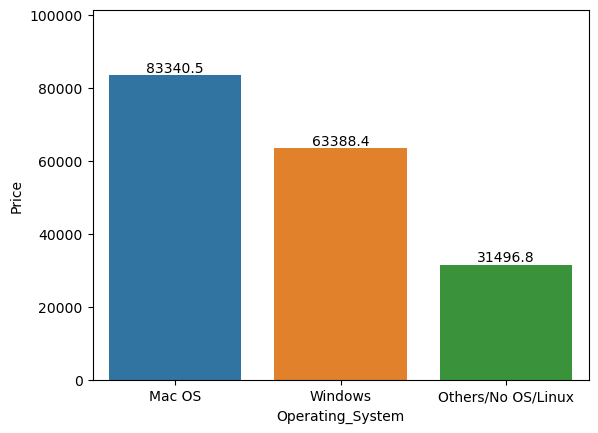

In [102]:
# by default it shows the mean value of Price column 
# we can use estimator = np.median or so on to change
# as obvious MAC is expensive than others

ax = sns.barplot(x=df['Operating_System'] , y=df['Price'], errwidth=0, order=order_series)
for i in ax.containers:
    ax.bar_label(i,)

# same as above
ax1 = sns.barplot(x=df['Operating_System'] , y=df['Price'], ci=0, errwidth=2, estimator=np.mean,
                 order=order_series)
# ax = sns.barplot(x=df['Operating_System'] , y=df['Price'], errwidth=0, order=order_series)
for i in ax1.containers:
    ax1.bar_label(i,)
    
plt.show()

In [103]:
np.mean(df[df['Operating_System'] == 'Mac OS'].Price)

83340.49988571428

In [104]:
max(df[df['Operating_System'] == 'Mac OS'].Price)

152274.24

In [105]:
np.mean(df[df['Operating_System'] == 'Windows'].Price)

63388.36069119984

# Weight column

C:\Users\akshat.agrawal\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


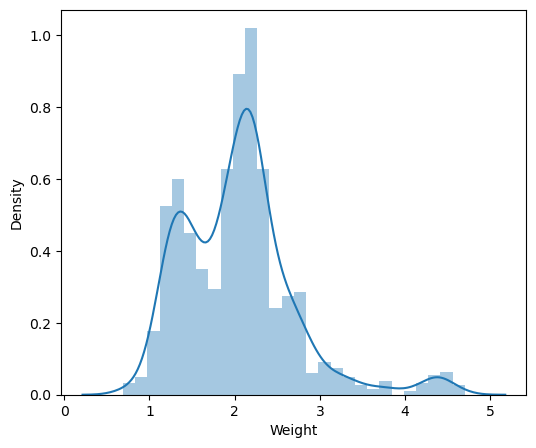

In [106]:
plt.figure(figsize = (6,5))
sns.distplot(df['Weight'])
plt.show()
# we see that weight column is normally distributed, there is just a bit high frequency around 1 and 2 kg, but no issues

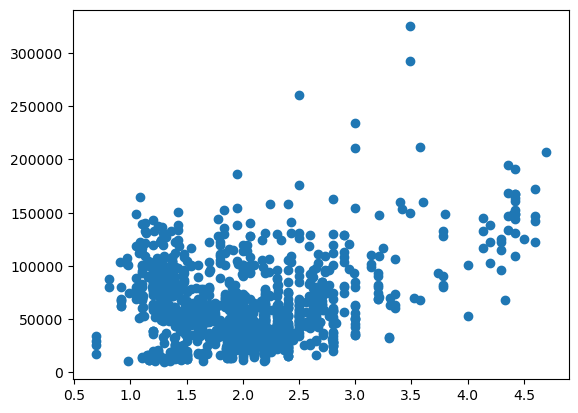

In [107]:
plt.scatter(x=df['Weight'], y=df['Price'])
#thre is a very little linear relationship between weight and price

In [108]:
df.corr()['Weight']['Price']
# weight and price are not much correlated

0.2098669245531431

C:\Users\akshat.agrawal\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

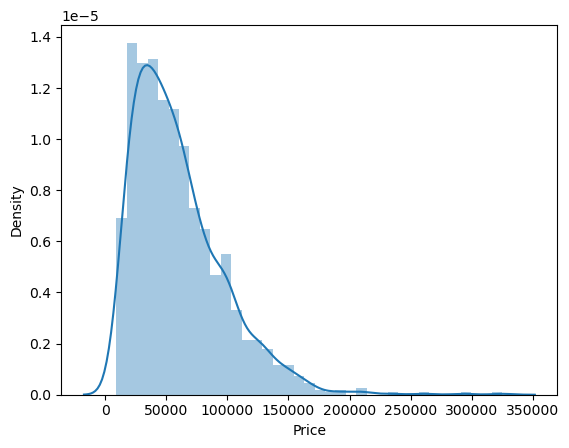

In [109]:
sns.distplot(df['Price'])
# price column is right skewed

we see the distribution of the target variable(Price) is right-skewed. By transforming it to normal distribution, performance of the algorithm will increase. we take the log of values that transform to the normal distribution. 
# So while separating dependent and independent variables we will take a log of price, 
# and in displaying the result perform exponent of it.

C:\Users\akshat.agrawal\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

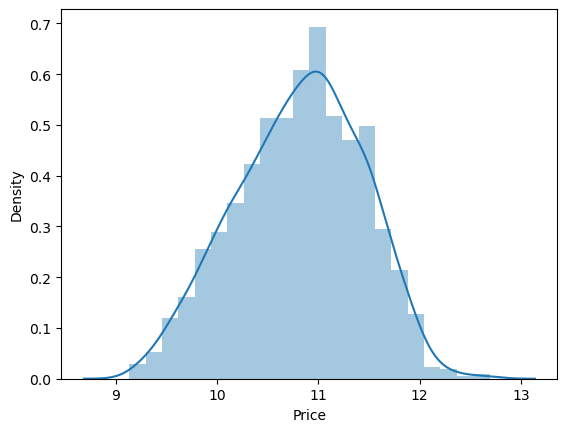

In [110]:
# after log transformation

sns.distplot(np.log(df['Price']))

# now it is normally distributed

In [111]:
df.to_csv("Laptop_Cleaned_Data.csv")

# Machine Learning Modeling for Laptop Price Prediction

Now we have prepared our data and have a better understanding of the dataset. so let’s get started with Machine learning model and find the best algorithm with the best hyperparameters to achieve maximum accuracy

In [112]:
# independent variable
x = df.drop(columns = ['Price'])
x

,Company,TypeName,Ram,Weight,TouchScreen,Ips,PPI,Cpu Brand,HDD,SSD,Gpu Brand,Operating_System
0,Apple,Ultrabook,8,1.37,Not Touch,IPS Channel,226.983005,Intel Core i5,0,128,Intel,Mac OS
1,Apple,Ultrabook,8,1.34,Not Touch,Not IPS Channel,127.677940,Intel Core i5,0,0,Intel,Mac OS
2,HP,Notebook,8,1.86,Not Touch,Not IPS Channel,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,Not Touch,IPS Channel,220.534624,Intel Core i7,0,512,AMD,Mac OS
4,Apple,Ultrabook,8,1.37,Not Touch,IPS Channel,226.983005,Intel Core i5,0,256,Intel,Mac OS
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,Touch,IPS Channel,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,Touch,IPS Channel,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,Not Touch,Not IPS Channel,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,Not Touch,Not IPS Channel,100.454670,Intel Core i7,1000,0,AMD,Windows


In [113]:
y = np.log(df['Price'])
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [114]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=23)

In [115]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1041, 12)
(261, 12)
(1041,)
(261,)


# We'll do Encoding for Categorical columns

In [116]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [117]:
x_train

,Company,TypeName,Ram,Weight,TouchScreen,Ips,PPI,Cpu Brand,HDD,SSD,Gpu Brand,Operating_System
410,Lenovo,Workstation,8,2.67,Not Touch,Not IPS Channel,141.211998,Intel Core i7,0,512,Nvidia,Windows
756,HP,Notebook,8,2.20,Not Touch,IPS Channel,141.211998,Intel Core i5,1000,128,Nvidia,Windows
502,Lenovo,2 in 1 Convertible,8,1.40,Touch,IPS Channel,158.482530,Intel Core i5,0,256,Intel,Windows
0,Apple,Ultrabook,8,1.37,Not Touch,IPS Channel,226.983005,Intel Core i5,0,128,Intel,Mac OS
1116,Lenovo,Gaming,16,4.60,Not Touch,IPS Channel,127.335675,Intel Core i7,0,256,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
31,Asus,Notebook,2,1.65,Not Touch,Not IPS Channel,111.935204,AMD Processor,0,0,AMD,Windows
950,HP,Workstation,8,2.00,Not Touch,IPS Channel,141.211998,Intel Core i7,0,8,Nvidia,Windows
1064,MSI,Gaming,16,1.80,Not Touch,Not IPS Channel,141.211998,Intel Core i7,1000,256,Nvidia,Windows
742,Toshiba,Notebook,8,1.25,Touch,IPS Channel,157.350512,Intel Core i5,0,256,Intel,Windows


# Linear Regression

In [118]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,4,5,7,10,11])
],remainder='passthrough'
                         )


# column_tnf is the name of transformer
# [0,1,7,8,9,10,11] -> columns on which onehot encoding is to be applied
# to avoid multi collinearity so drop=first
# we don't want a sparse array so sparse = False 
step2 = StandardScaler()

step3 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2),
    ('step3',step3)
])

pipe.fit(x_train,y_train)

y_pred_test = pipe.predict(x_test)

print('Test Mean Absolute Error : ',mean_absolute_error(y_test,y_pred_test))
print('Test Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,y_pred_test)))

y_pred_train = pipe.predict(x_train)
# y_pred_train.shape
# y_train.shape
print("Training Mean Absolute Error : ",mean_absolute_error(y_train,y_pred_train))
print("Training Root Mean Squared Error : ", np.sqrt(mean_squared_error(y_train,y_pred_train)))

print('R2 score',r2_score(y_test,y_pred_test))

#r2_score near to 1 means a good fit

# metrics were same with or without scaling

Test Mean Absolute Error :  0.21248724923226522
Test Root Mean Squared Error :  0.26581299550635223
Training Mean Absolute Error :  0.19788956802697447
Training Root Mean Squared Error :  0.25541371647155303
R2 score 0.815389892245531


In [119]:
model = pipe.fit(x_train, y_train)

In [120]:
model.feature_names_in_

array(['Company', 'TypeName', 'Ram', 'Weight', 'TouchScreen', 'Ips',
       'PPI', 'Cpu Brand', 'HDD', 'SSD', 'Gpu Brand', 'Operating_System'],
      dtype=object)

In [121]:
model.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 4, 5, 7, 10, 11])])),
                ('step2', StandardScaler()), ('step3', LinearRegression())])>

In [122]:
model.steps

[('step1',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('col_tnf',
                                   OneHotEncoder(drop='first', sparse=False),
                                   [0, 1, 4, 5, 7, 10, 11])])),
 ('step2', StandardScaler()),
 ('step3', LinearRegression())]

In [123]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041 entries, 410 to 595
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1041 non-null   object 
 1   TypeName          1041 non-null   object 
 2   Ram               1041 non-null   int32  
 3   Weight            1041 non-null   float32
 4   TouchScreen       1041 non-null   object 
 5   Ips               1041 non-null   object 
 6   PPI               1041 non-null   float64
 7   Cpu Brand         1041 non-null   object 
 8   HDD               1041 non-null   int64  
 9   SSD               1041 non-null   int64  
 10  Gpu Brand         1041 non-null   object 
 11  Operating_System  1041 non-null   object 
dtypes: float32(1), float64(1), int32(1), int64(2), object(7)
memory usage: 97.6+ KB


# Ridge Regression

In [124]:
step_1_ridge_ = ColumnTransformer(transformers=[('column_tnf', OneHotEncoder(sparse=False, drop='first'),
                                                 [0,1,4,5,7,10,11])],
                         remainder = 'passthrough')
# [0,1,7,8,9,10,11] -> columns on which onehot encoding is to be applied
# to avoid multi collinearity so drop=first
# we don't want a sparse array so sparse = False


step_2_ridge_ = Ridge(alpha=10)

pipe_ridge = Pipeline([('step1' , step_1_ridge_),
               ('step2' , step_2_ridge_) 
                ])

pipe_ridge.fit(x_train, y_train)


y_predict_ridge = pipe_ridge.predict(x_test)

print("R2_Score : ", r2_score(y_test, y_predict_ridge))
print("MAE : ", mean_absolute_error(y_test, y_predict_ridge))

# not shown much improvement than Linear  Regression

R2_Score :  0.8115502435134089
MAE :  0.21764536773833346


# Lasso

In [125]:
step_1_lasso_ = ColumnTransformer(transformers=[('column_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,4,5,7,8,9,10,11])],
                         remainder = 'passthrough')
# [0,1,7,8,9,10,11] -> columns on which onehot encoding is to be applied
# to avoid multi collinearity so drop=first
# we don't want a sparse array so sparse = False


step_2_lasso_ = Lasso(alpha=0.001)

pipe_lasso = Pipeline([('step1' , step_1_lasso_),
               ('step2' , step_2_lasso_) 
                ])

pipe_lasso.fit(x_train, y_train)


y_predict_lasso = pipe_lasso.predict(x_test)

print("R2_Score : ", r2_score(y_test, y_predict_lasso))
print("MAE : ", mean_absolute_error(y_test, y_predict_lasso))

# not shown much improvement than Linear  Regression

R2_Score :  0.8190259764530761
MAE :  0.21261598240659038


# KNN

In [126]:
step_1_knn_ = ColumnTransformer(transformers=[('column_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,4,5,7,8,9,10,11])],
                         remainder = 'passthrough')
# [0,1,7,8,9,10,11] -> columns on which onehot encoding is to be applied
# to avoid multi collinearity so drop=first
# we don't want a sparse array so sparse = False


step_2_knn_ = KNeighborsRegressor(n_neighbors=3)

pipe_knn = Pipeline([('step1' , step_1_knn_),
               ('step2' , step_2_knn_) 
                ])

pipe_knn.fit(x_train, y_train)


y_predict_knn = pipe_knn.predict(x_test)

print("R2_Score : ", r2_score(y_test, y_predict_knn))
print("MAE : ", mean_absolute_error(y_test, y_predict_knn))

# not shown much improvement

R2_Score :  0.8190818540331346
MAE :  0.1987175055619456


# Decision Tree Regressor

In [127]:
step_1_dt_ = ColumnTransformer(transformers=[('column_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,4,5,7,8,9,10,11])],
                         remainder = 'passthrough')
# [0,1,7,8,9,10,11] -> columns on which onehot encoding is to be applied
# to avoid multi collinearity so drop=first
# we don't want a sparse array so sparse = False


step_2_dt_ = DecisionTreeRegressor(max_depth=8)

pipe_dt = Pipeline([('step1' , step_1_dt_),
               ('step2' , step_2_dt_) 
                ])

pipe_dt.fit(x_train, y_train)


y_predict_dt = pipe_dt.predict(x_test)

print("R2_Score : ", r2_score(y_test, y_predict_dt))
print("MAE : ", mean_absolute_error(y_test, y_predict_dt))


R2_Score :  0.8012783819270227
MAE :  0.20343743134344283


# SVM

In [128]:
step_1_svm_ = ColumnTransformer(transformers=[('column_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,4,5,7,8,9,10,11])],
                         remainder = 'passthrough')
# [0,1,7,8,9,10,11] -> columns on which onehot encoding is to be applied
# to avoid multi collinearity so drop=first
# we don't want a sparse array so sparse = False


step_2_svm_ = SVR(kernel = 'rbf' , C=10000, epsilon=0.1)

pipe_svm = Pipeline([('step1' , step_1_svm_),
               ('step2' , step_2_svm_) 
                ])

pipe_svm.fit(x_train, y_train)


y_predict_svm = pipe_svm.predict(x_test)

print("R2_Score : ", r2_score(y_test, y_predict_svm))
print("MAE : ", mean_absolute_error(y_test, y_predict_svm))

# significant result with SVM 

R2_Score :  0.8628208976887303
MAE :  0.17829299375598806


# Random Forest

In [129]:
step_1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,4,5,7,10,11])],
                          # remainder='passthrough'
                          )

step_2 = RandomForestRegressor(n_estimators=100,
random_state=3,
max_samples=0.5,
max_features=0.75,
max_depth=15)




pipe1 = Pipeline([('step1',step_1),('step2',step_2)])

pipe1.fit(x_train, y_train)


y_predict1 = pipe1.predict(x_test)

print("R2_Score : ", r2_score(y_test, y_predict1))
print("MAE : ", mean_absolute_error(y_test, y_predict1))

R2_Score :  0.773886089603496
MAE :  0.22589613810781825


# Gradient Boost

In [130]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,4,5,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8974435291128611
MAE 0.15500643783748375


# XG Boost

In [131]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,4,5,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe_xgb = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_xgb.fit(x_train,y_train)

y_pred_xgb = pipe_xgb.predict(x_test)

print('R2 score',r2_score(y_test,y_pred_xgb))
print('MAE',mean_absolute_error(y_test,y_pred_xgb))

R2 score 0.8957793159526471
MAE 0.15684680815691143


Base model

best model Hyper Parameter Tuning for all model
gride search
random search
rmse

compare all models

rmse
adjr2

champion model


Summary
explanation

In [132]:
x_train

,Company,TypeName,Ram,Weight,TouchScreen,Ips,PPI,Cpu Brand,HDD,SSD,Gpu Brand,Operating_System
410,Lenovo,Workstation,8,2.67,Not Touch,Not IPS Channel,141.211998,Intel Core i7,0,512,Nvidia,Windows
756,HP,Notebook,8,2.20,Not Touch,IPS Channel,141.211998,Intel Core i5,1000,128,Nvidia,Windows
502,Lenovo,2 in 1 Convertible,8,1.40,Touch,IPS Channel,158.482530,Intel Core i5,0,256,Intel,Windows
0,Apple,Ultrabook,8,1.37,Not Touch,IPS Channel,226.983005,Intel Core i5,0,128,Intel,Mac OS
1116,Lenovo,Gaming,16,4.60,Not Touch,IPS Channel,127.335675,Intel Core i7,0,256,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
31,Asus,Notebook,2,1.65,Not Touch,Not IPS Channel,111.935204,AMD Processor,0,0,AMD,Windows
950,HP,Workstation,8,2.00,Not Touch,IPS Channel,141.211998,Intel Core i7,0,8,Nvidia,Windows
1064,MSI,Gaming,16,1.80,Not Touch,Not IPS Channel,141.211998,Intel Core i7,1000,256,Nvidia,Windows
742,Toshiba,Notebook,8,1.25,Touch,IPS Channel,157.350512,Intel Core i5,0,256,Intel,Windows


# Exporting the model

In [133]:
# took XGradient Boost, as it performs the best here

In [134]:
import pickle

In [135]:
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))